<a href="https://colab.research.google.com/github/loicdaloz/etfdata/blob/main/002_ETF_Comparison_Tool.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Description: Program to compare ETF

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use ('fivethirtyeight')

In [ ]:
#Load the data
from google.colab import files
files.upload()

In [ ]:
spy = pd.read_csv('SPY.csv')
voo = pd.read_csv('VOO.csv')
vgt = pd.read_csv('VGT.csv')

In [ ]:
print(spy)
print(voo)
print(vgt)

            Date        Open        High         Low       Close   Adj Close  \
0     2018-01-19  279.799988  280.410004  279.140015  280.410004  257.453705   
1     2018-01-22  280.170013  282.690002  280.109985  282.690002  259.547058   
2     2018-01-23  282.739990  283.619995  282.369995  283.290009  260.097900   
3     2018-01-24  284.019989  284.700012  281.839996  283.179993  259.996979   
4     2018-01-25  284.160004  284.269989  282.399994  283.299988  260.107117   
...          ...         ...         ...         ...         ...         ...   
1253  2023-01-11  392.230011  395.600006  391.380005  395.519989  395.519989   
1254  2023-01-12  396.670013  398.489990  392.420013  396.959991  396.959991   
1255  2023-01-13  393.619995  399.100006  393.339996  398.500000  398.500000   
1256  2023-01-17  398.480011  400.230011  397.059998  397.769989  397.769989   
1257  2023-01-18  399.010010  400.119995  391.279999  391.489990  391.489990   

         Volume  
0     140920100  
1  

In [ ]:
df = pd.DataFrame()
df['Date'] = spy['Date']
df['SPY'] = spy['Adj Close'].values
df['VOO'] = voo['Adj Close'].values
df['VGT'] = vgt['Adj Close'].values
#Set dates as index
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
df

,Date,SPY,VOO,VGT
2018-01-19,2018-01-19,257.453705,235.931473,167.325226
2018-01-22,2018-01-22,259.547058,237.826813,168.618179
2018-01-23,2018-01-23,260.097900,238.366989,169.644821
2018-01-24,2018-01-24,259.996979,238.247955,168.133270
2018-01-25,2018-01-25,260.107117,238.357788,167.695999
...,...,...,...,...
2023-01-11,2023-01-11,395.519989,363.450012,331.649994
2023-01-12,2023-01-12,396.959991,364.809998,334.239990
2023-01-13,2023-01-13,398.500000,366.230011,335.649994
2023-01-17,2023-01-17,397.769989,365.670013,337.329987


<function matplotlib.pyplot.show(*args, **kw)>

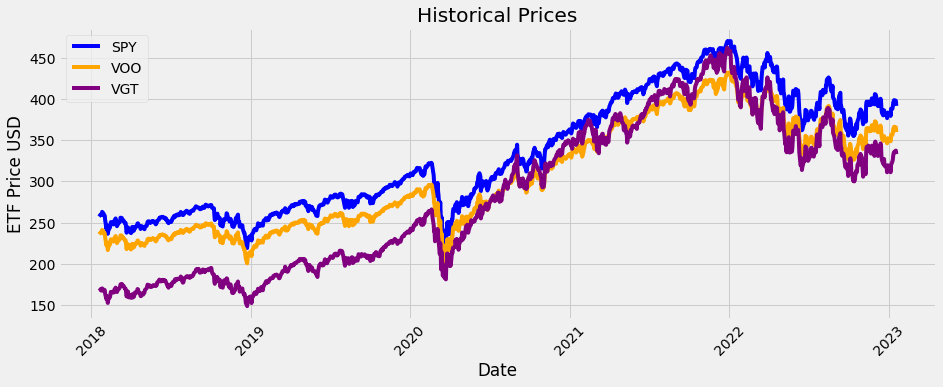

In [ ]:
#Plot the data
plt.figure(figsize=(14,5))
plt.plot(df.index, df['SPY'], label='SPY', color='blue')
plt.plot(df.index, df['VOO'], label='VOO', color='orange')
plt.plot(df.index, df['VGT'], label='VGT', color='purple')
plt.xlabel('Date')
plt.ylabel('ETF Price USD')
plt.legend()
plt.title('Historical Prices')
plt.xticks(rotation=45)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

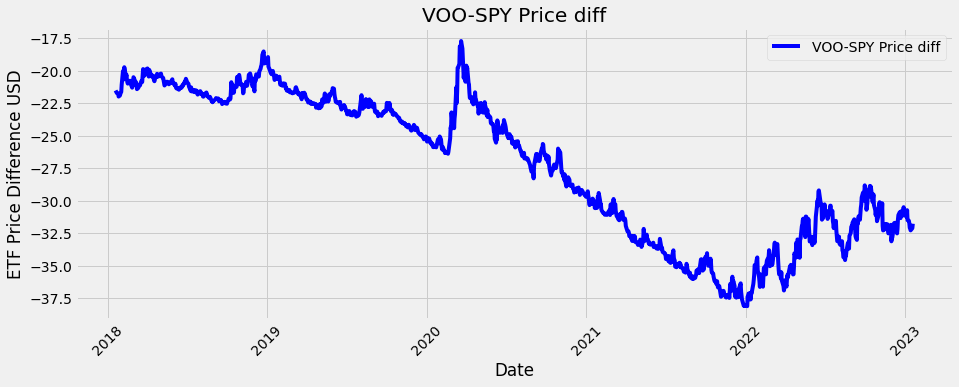

In [ ]:
df['VOO-SPY Price diff']= df['VOO'] - df['SPY']
#Plot the data
plt.figure(figsize=(14,5))
plt.plot(df.index, df['VOO-SPY Price diff'], label='VOO-SPY Price diff', color='blue')
plt.xlabel('Date')
plt.ylabel('ETF Price Difference USD')
plt.legend()
plt.title('VOO-SPY Price diff')
plt.xticks(rotation=45)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

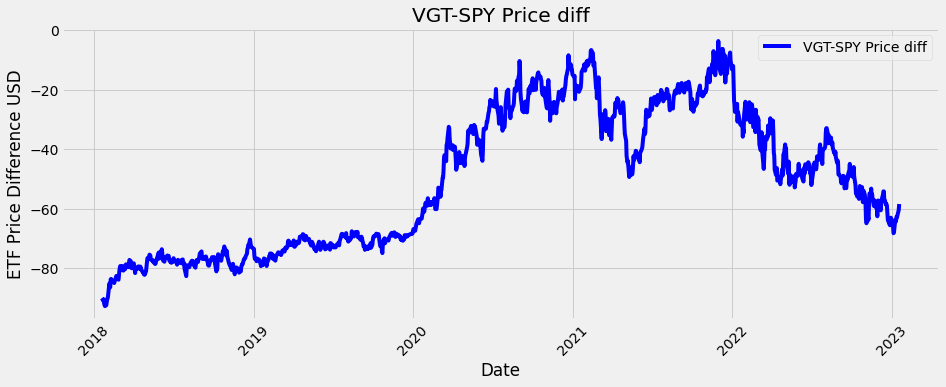

In [ ]:
df['VGT-SPY Price diff']= df['VGT'] - df['SPY']
#Plot the data
plt.figure(figsize=(14,5))
plt.plot(df.index, df['VGT-SPY Price diff'], label='VGT-SPY Price diff', color='blue')
plt.xlabel('Date')
plt.ylabel('ETF Price Difference USD')
plt.legend()
plt.title('VGT-SPY Price diff')
plt.xticks(rotation=45)
plt.show

In [ ]:
#Get daily return
daily_simple_return = df[['SPY', 'VOO', 'VGT']].pct_change(1)
daily_simple_return

,SPY,VOO,VGT
2018-01-19,NaN,NaN,NaN
2018-01-22,0.008131,0.008033,0.007727
2018-01-23,0.002122,0.002271,0.006089
2018-01-24,-0.000388,-0.000499,-0.008910
2018-01-25,0.000424,0.000461,-0.002601
...,...,...,...
2023-01-11,0.012648,0.012762,0.016863
2023-01-12,0.003641,0.003742,0.007809
2023-01-13,0.003880,0.003892,0.004219
2023-01-17,-0.001832,-0.001529,0.005005


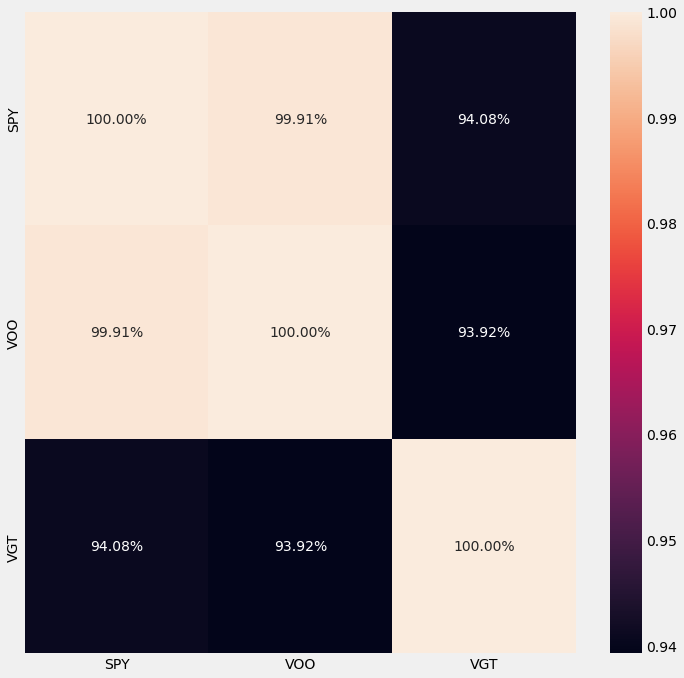

In [ ]:
#Show correlation between ETF
plt.subplots(figsize=(11,11))
sns.heatmap(daily_simple_return.corr(), annot= True, fmt= '.2%')

In [ ]:
#Show the co-variance matrix
daily_simple_return.cov()

,SPY,VOO,VGT
SPY,0.000185,0.000187,0.000228
VOO,0.000187,0.000190,0.000230
VGT,0.000228,0.000230,0.000317


In [ ]:
#Get the variance
daily_simple_return.var()

SPY    0.000185
VOO    0.000190
VGT    0.000317
dtype: float64

In [ ]:
#Get volatily
daily_simple_return.std() * 100

SPY    1.360696
VOO    1.378767
VGT    1.779657
dtype: float64

In [ ]:
#Show the mean or average daily simple return
daily_simple_return.mean() * 100

SPY    0.042649
VOO    0.043111
VGT    0.070661
dtype: float64

In [ ]:
#Annualized returns
daily_simple_return.mean() * 100 * 252

SPY    10.747613
VOO    10.863890
VGT    17.806499
dtype: float64